# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings and do not display them

In [2]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# set size of the seaborn plots
sns.set(rc = {'figure.figsize':(15,8)})

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

### Load data

In [3]:
# load data
INN = pd.read_csv("INNHotelsGroup.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
data = INN.copy()

### View the first and last 5 rows of the dataset.

In [5]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [6]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


### Understand the shape of the dataset.

In [7]:
data.shape

(36275, 19)

- *Data set has 36275 rows and 19 columns*

### Check the data types of the columns for the dataset.

In [8]:
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- *Dependent variable is booking_status which is a categorical column*
- *Independent variables such as type_of_meal_plan, room_type_reserved, market_segment_type are categorical and the rest are numarical types.*

In [10]:
# check if there are missing values
data.isnull().sum().sum()

0

- *There are no missing values in the data*

   ### Checking for duplicates

In [11]:
data.duplicated().any()

False

- *No duplicates in the data*

### Dropping the Booking ID column

In [12]:
data.drop("Booking_ID", axis=1, inplace=True)

### Summary of the dataset.

In [13]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


In [14]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [15]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in type_of_meal_plan are :
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in room_type_reserved are :
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are :
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Unique values in booking_status are :
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

# Univariate analysis

### Creating functions that will be used during Univariate Analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### Observations on the target variable

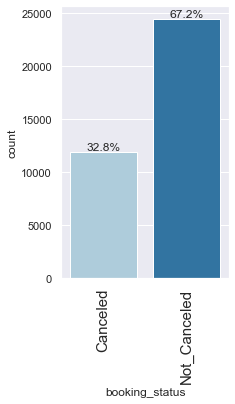

In [18]:
labeled_barplot(data, "booking_status", perc=True)

- *Cancelled bookings in the data set are  32.8%*
- *Bookings that were not cancelled are 67.2%*

### Observations on the type of room reserved by customers

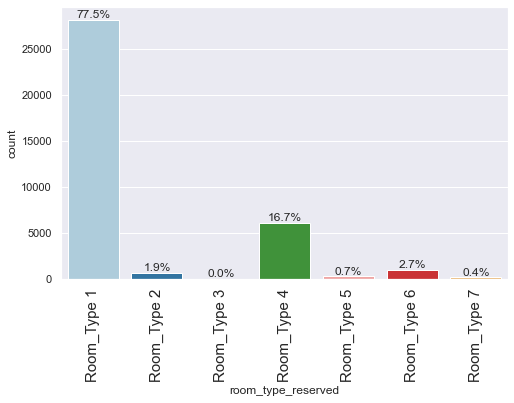

In [19]:
labeled_barplot(data, "room_type_reserved", perc=True)

- *A lot of people reserve room_type_1*

### Observations on Arrival months

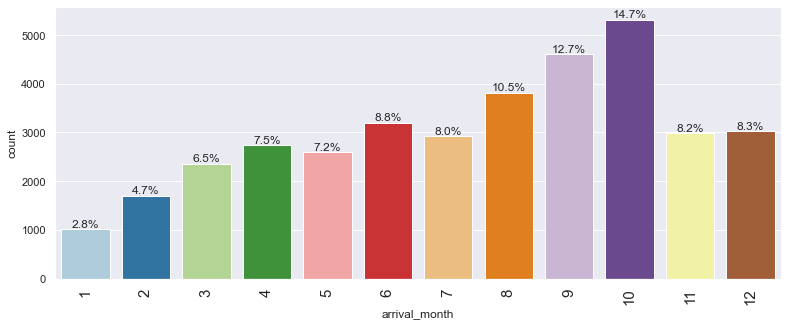

In [20]:
labeled_barplot(data, "arrival_month", perc=True)

- *The highest percentage of bookings are for the month of October*
- *The top three busiest months are October, September and August in descending order.*
- *January has the lowest number of bookings*

### Obsevations on the market segment designation

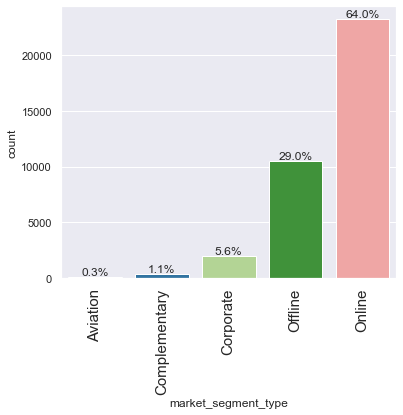

In [21]:
labeled_barplot(data, "market_segment_type", perc=True)

- *The Online market segment type has the highest number of bookings*

### Observations on the number of adults

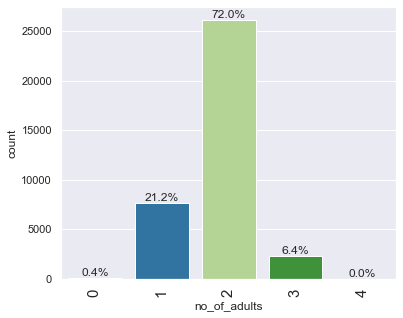

In [22]:
labeled_barplot(data, "no_of_adults", perc=True)

- *Most bookings are made for 2 adults per room*

### Observations on the number of children per booking 

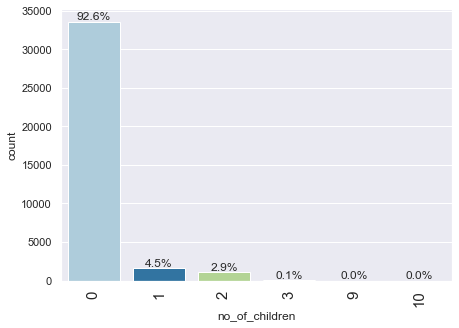

In [23]:
labeled_barplot(data, "no_of_children", perc=True)

**The highest percentage of hotel bookings don't include children**
- This means that most people that make hotel bookings don't come with children

### Observations on number week nights the guest booked to stay in the hotel

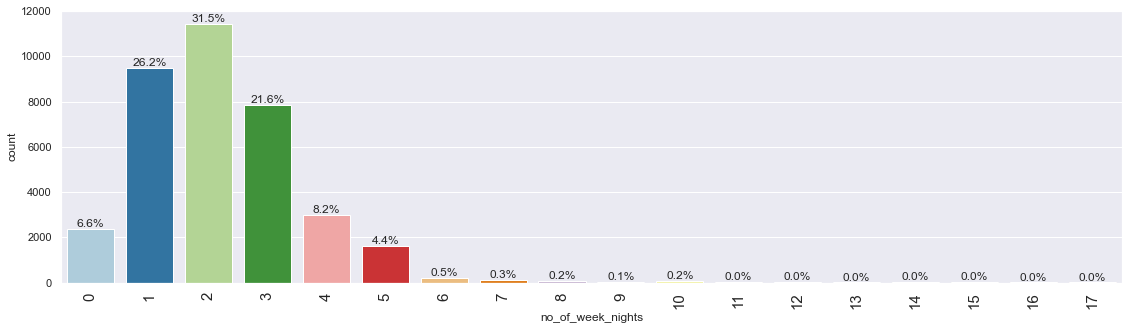

In [24]:
labeled_barplot(data, "no_of_week_nights", perc=True)

- *During the week days, most people make bookings for two days*

### Observations on the number of weekend nights the guests booked to stay

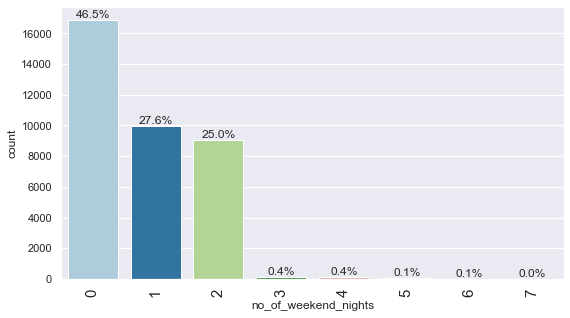

In [25]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

- *46.5% of the bookings are not on the weekends*
- *People who book the hotel rooms on the weekends book mostly for only one night*
- *It is not common for a customer to book for more than 2 weekend nights in a given booking because this would mean, the customer is booking those weekend nights for different weeks*.

### Observations on required car parking space that come with every booking

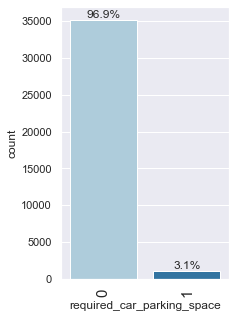

In [26]:
labeled_barplot(data, "required_car_parking_space", perc=True)

- *Most people do not require car parking space*
- *This raises a question on how people travel to the hotel, whether by public means or rented cars that don't require parking*

### Observations on the type of meal plan the customers book most

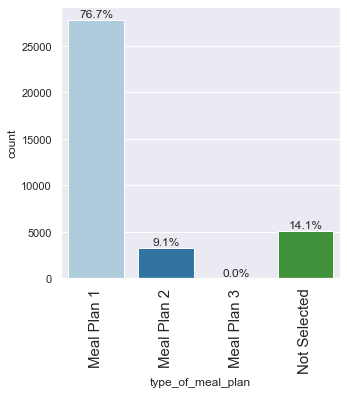

In [27]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

- *Most customers choose Meal plan 1 during their bookins(76.7%)*

### Obseravations on the number of special requests that come with bookins

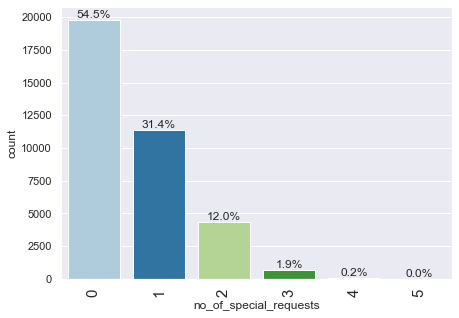

In [28]:
labeled_barplot(data, "no_of_special_requests", perc=True)

- *Most customers do not include special requests on their bookings and if they do, 31.4% include 1 request*

### Observations on the number of previous bookings cancelled by customers prior to the current booking

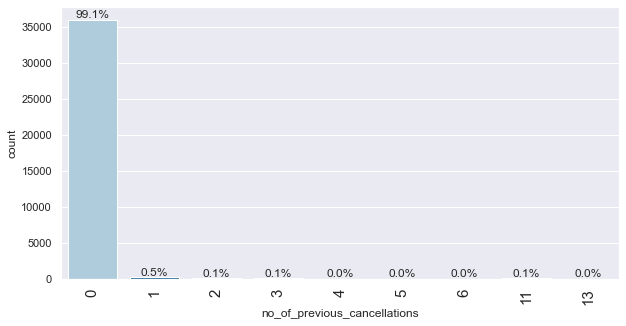

In [29]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True)

- *99.1% of the customers that make bookings have no previous cancellations*

### Observations on average prices of rooms

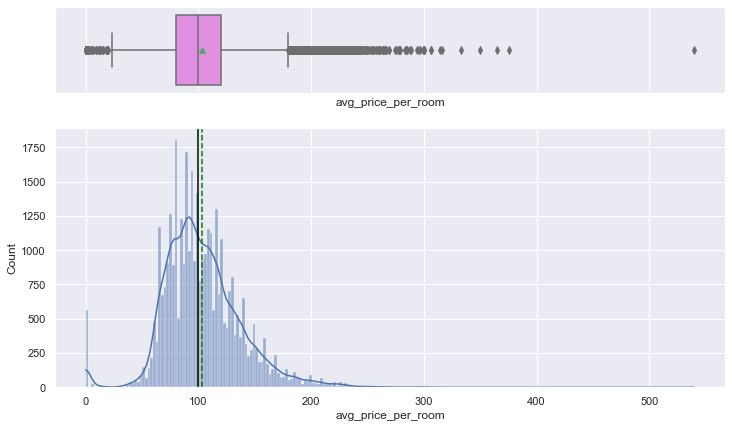

In [30]:
histogram_boxplot(data, "avg_price_per_room", kde=True)

### Observations on number of days between the date of booking and the arrival date

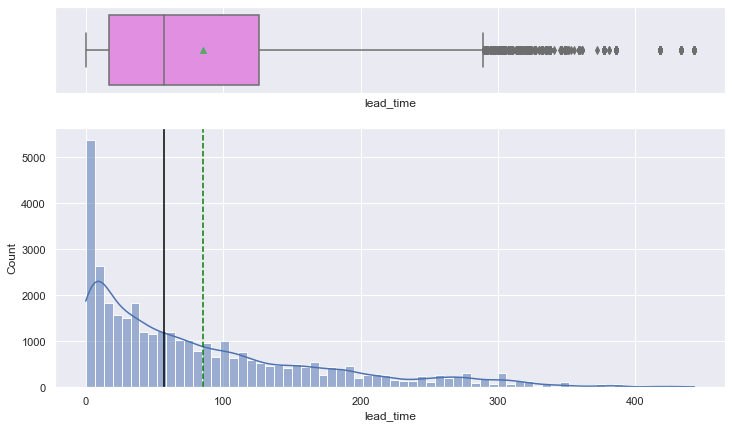

In [31]:
histogram_boxplot(data, "lead_time", kde=True)

# Bivariate Analysis

### Encoding canceled bookings to 1 and those not canceled to 0

In [32]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

###  Correlation Heatmap

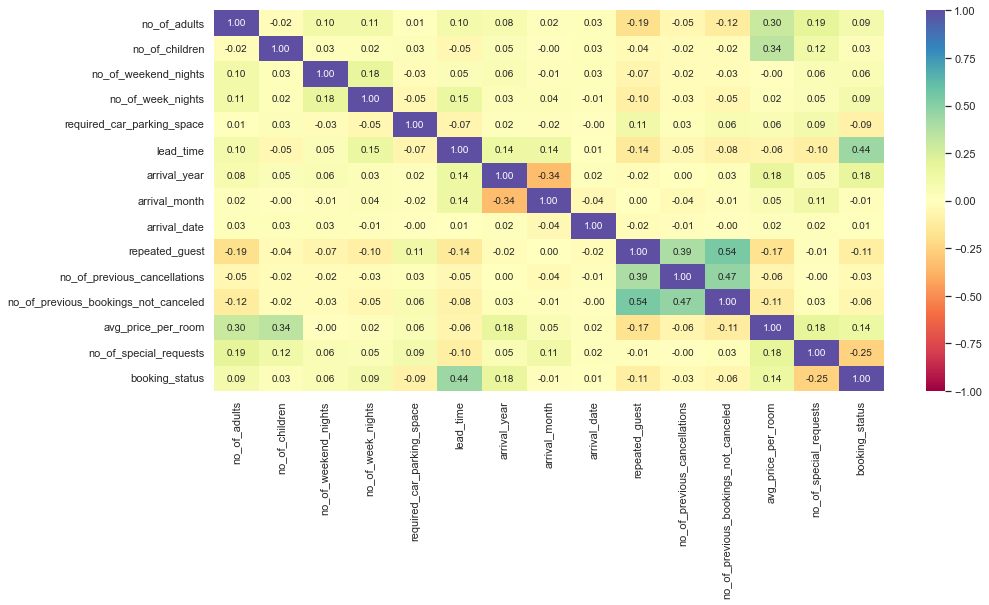

In [33]:
# creating a list of numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
);

- *Independent variables do not show high correlation among each other*
- *There is a positive correlation between lead time and booking status*

### Creating functions that will be used during Bivariate analysis

In [34]:
### Function to plot stacked bar charts for categorical columns
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Booking Status vs Parking space required

booking_status                  0      1    All
required_car_parking_space                     
All                         24390  11885  36275
0                           23380  11771  35151
1                            1010    114   1124
------------------------------------------------------------------------------------------------------------------------


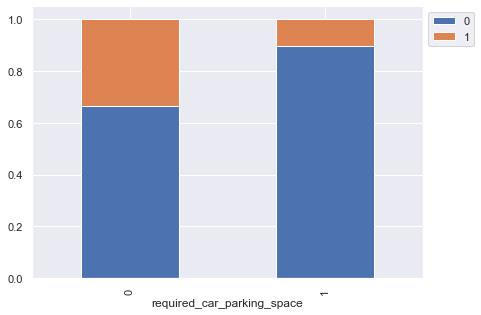

In [35]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

- *Approximately 10% of bookings that require parking space are cancelled*
- *Approximately  35% of bookings that don't require parking space are cancelled*

### Booking status vs Market segment type

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


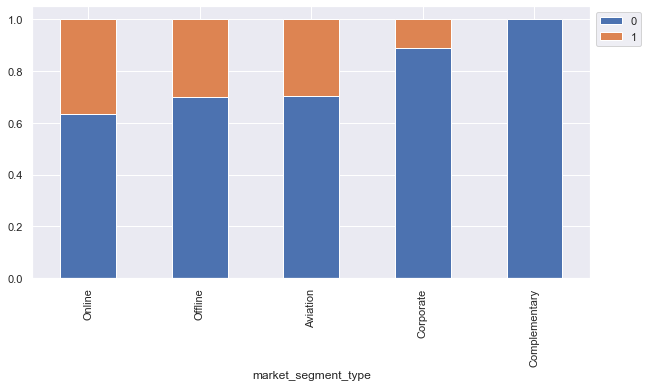

In [36]:
stacked_barplot(data, "market_segment_type", "booking_status")

- *Complementary Market segment type show no cancellations*
- *Approximately 10% of bookings from the corporate Market segment type are cancelled*
- *Aviation and offline market segment type show approximately equal number of cancellations(30%)*
- *Bookings from the online market segment type show the highest number of cancellations with approximately 35% cancellations*

### Booking status vs repeated guest

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


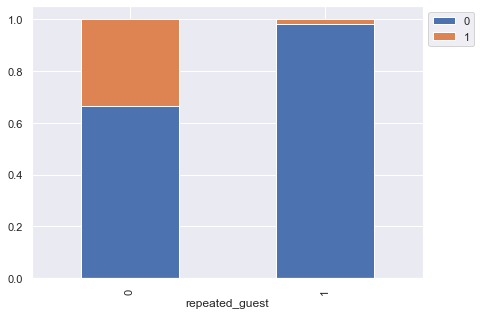

In [37]:
stacked_barplot(data, "repeated_guest", "booking_status")

- *Bookings from customers that have been guests before at the hotel show minimal cancellations*

### Booking status vs type of meal plan

booking_status         0      1    All
type_of_meal_plan                     
All                24390  11885  36275
Meal Plan 1        19156   8679  27835
Not Selected        3431   1699   5130
Meal Plan 2         1799   1506   3305
Meal Plan 3            4      1      5
------------------------------------------------------------------------------------------------------------------------


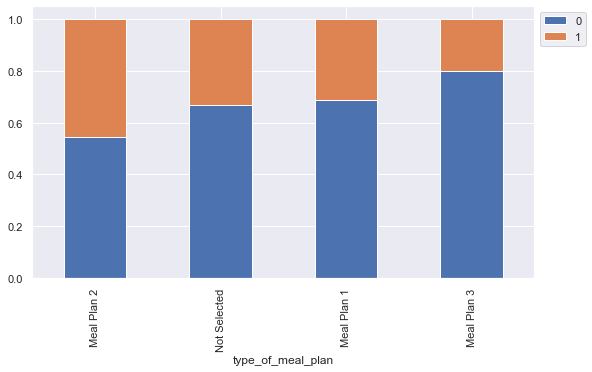

In [38]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

- *Hotel bookings that come with meal plan 3 show the least cancellations*

### Booking status vs room type reserved

booking_status          0      1    All
room_type_reserved                     
All                 24390  11885  36275
Room_Type 1         19058   9072  28130
Room_Type 4          3988   2069   6057
Room_Type 6           560    406    966
Room_Type 2           464    228    692
Room_Type 5           193     72    265
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


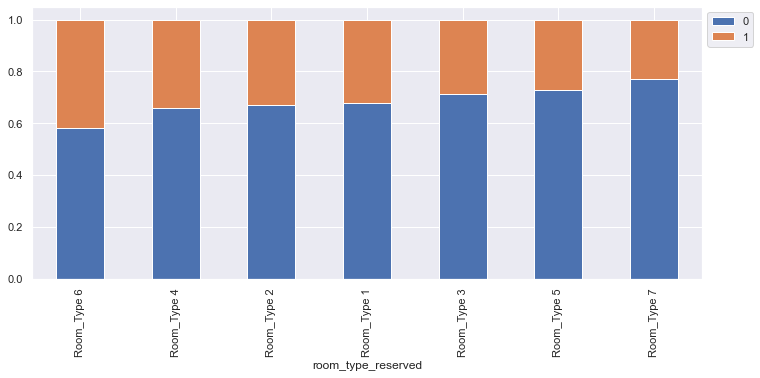

In [39]:
stacked_barplot(data, "room_type_reserved", "booking_status")

- *Bookings that reserve room type 6 show the most cancellations*
- *Generally there is no big variations in cancelletions per room type*

### Booking status vs number of adults

booking_status      0      1    All
no_of_adults                       
All             24390  11885  36275
2               16989   9119  26108
1                5839   1856   7695
3                1454    863   2317
0                  95     44    139
4                  13      3     16
------------------------------------------------------------------------------------------------------------------------


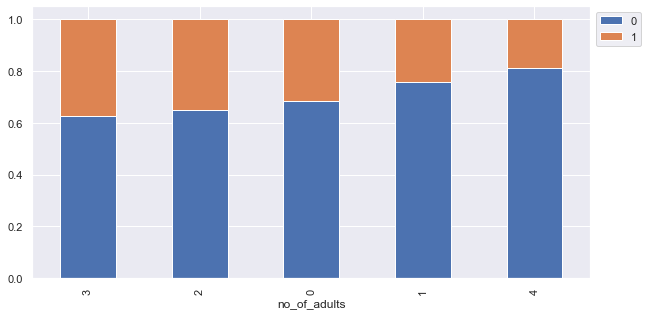

In [40]:
stacked_barplot(data, "no_of_adults", "booking_status")

- *Bookings that come with 4 adults requirement tend to be cancelled more*

### Booking status vs number of children

booking_status      0      1    All
no_of_children                     
All             24390  11885  36275
0               22695  10882  33577
1                1078    540   1618
2                 601    457   1058
3                  14      5     19
9                   1      1      2
10                  1      0      1
------------------------------------------------------------------------------------------------------------------------


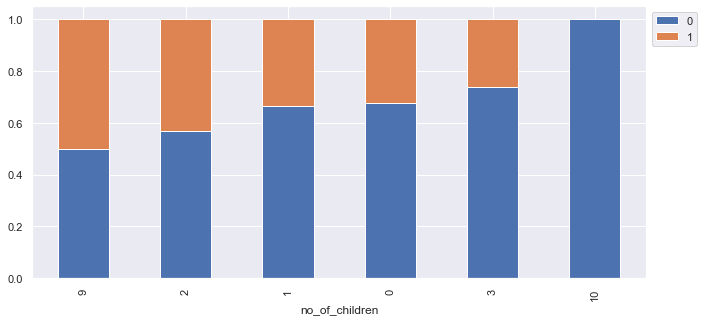

In [41]:
stacked_barplot(data, "no_of_children", "booking_status")

- *10 shows no cancellations as we saw before during analysis, there were approximately zero bookings with 10 childreen, hence no bookings with 10 children were cancelled*

In [42]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Boking status vs Average Price per room

In [43]:
# Create a data frame with only cancelled bookings
cancelled_bookings = data[data["booking_status"] == 1]

# Summary of cancelled bookings
cancelled_bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,11885.00000,1.90955,0.48624,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,11885.00000,0.12436,0.44090,0.00000,0.00000,0.00000,0.00000,9.00000
no_of_weekend_nights,11885.00000,0.88751,0.91927,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,11885.00000,2.39226,1.58309,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,11885.00000,0.00959,0.09747,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,11885.00000,139.21548,98.94773,0.00000,55.00000,122.00000,205.00000,443.00000
arrival_year,11885.00000,2017.91914,0.27263,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,11885.00000,7.37425,2.65542,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,11885.00000,15.73008,8.78395,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,11885.00000,0.00135,0.03667,0.00000,0.00000,0.00000,0.00000,1.00000


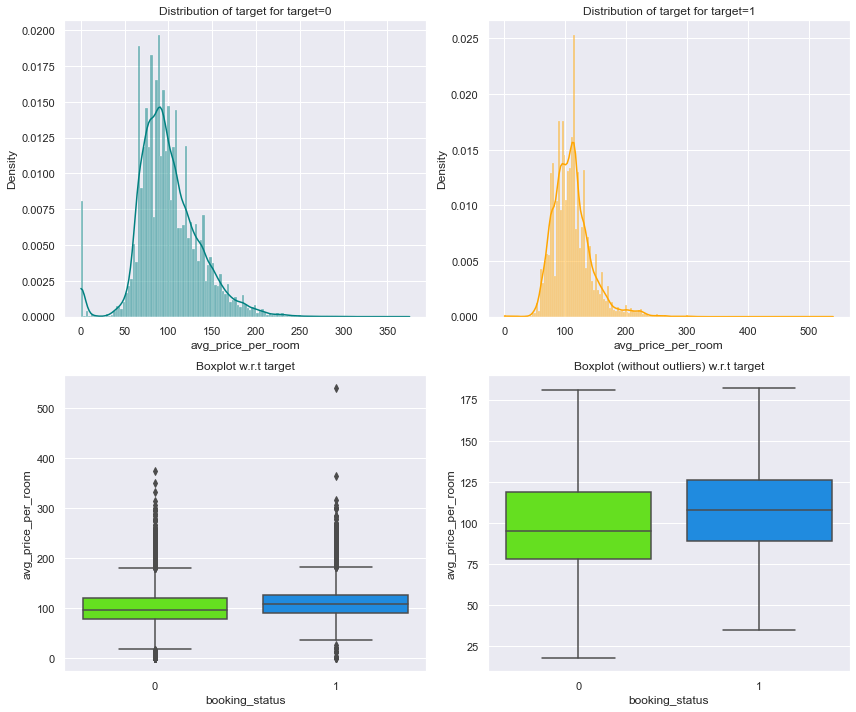

In [44]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

### Observations:
- *The average price of rooms for cancelled bookings is about 110 Euros* 

### Lead time vs booking status

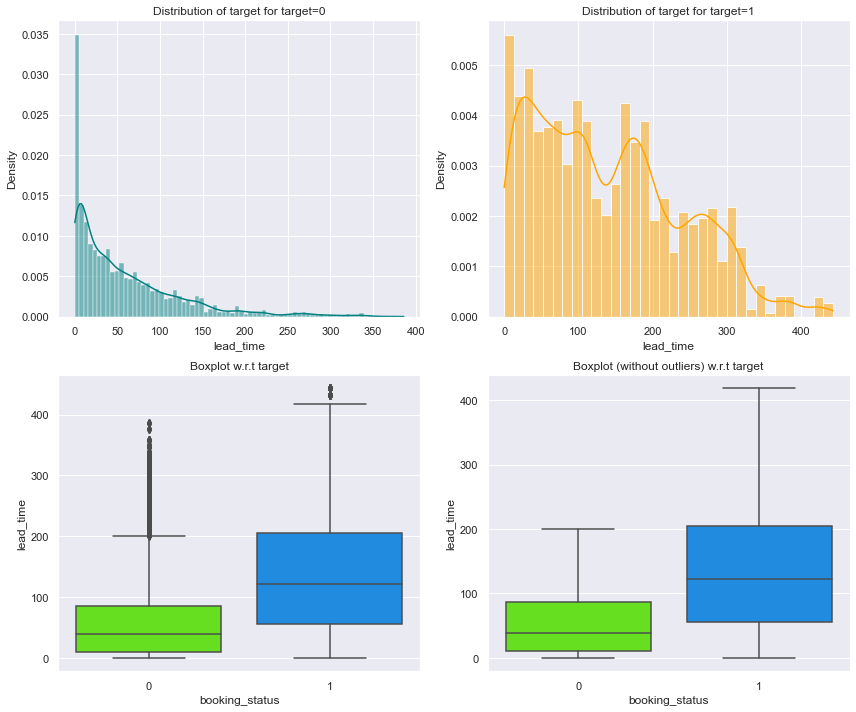

In [45]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

- *The average lead time of cancelled bookings is about 139 days.*

### Number of special requests of  the customers vs price of the rooms  

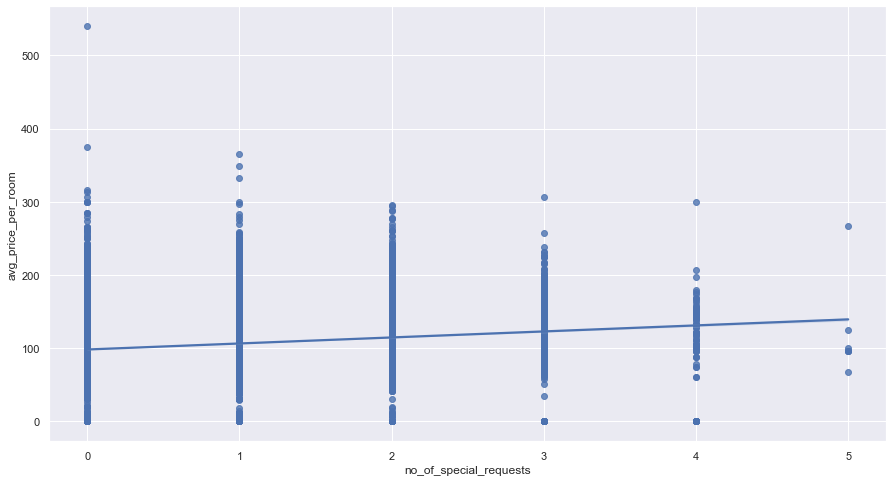

In [46]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(data=data, x = "no_of_special_requests", y = "avg_price_per_room");

#### Observations:
- *As the number of special requests increase, Average price per room tends to increase, though not a very steep increament.*

### Number of people per room vs the average price of rooms vs booking status

In [47]:
# creating a new copy of the data frame
people_data = data.copy()
# create a data a column for total number of people in a room
people_data["total_no_of_people"] = (
    people_data["no_of_adults"] + people_data["no_of_children"]
)

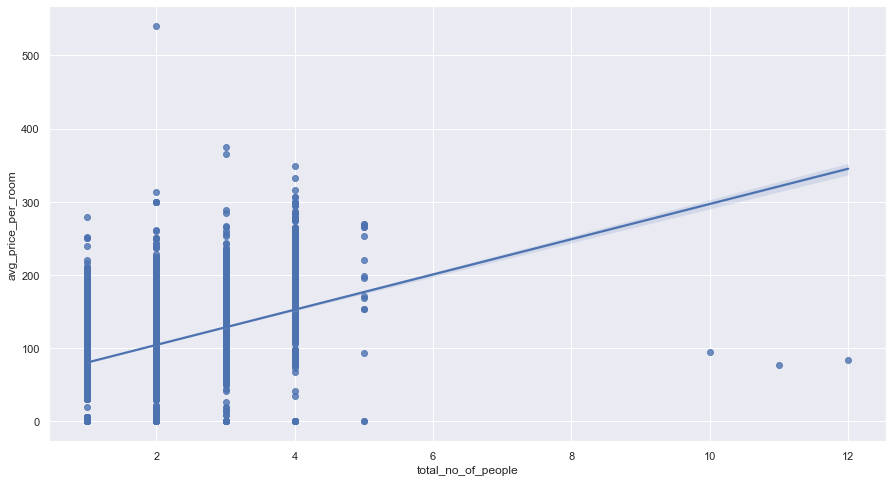

In [48]:
# visualize how the avg_price_per_room vs total_no_of_people
sns.regplot(data=people_data, x="total_no_of_people", y="avg_price_per_room");

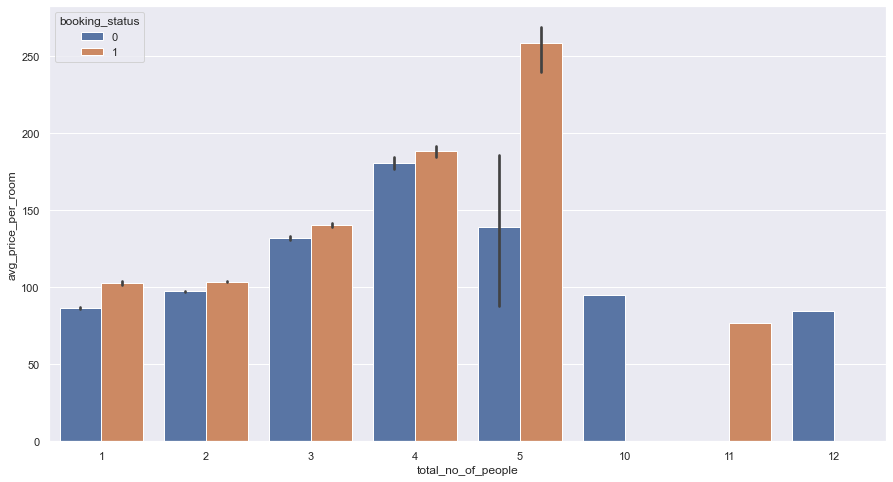

In [49]:
# visualize how the avg_price_per_room vs total_no_of_people vs booking_status
sns.barplot(data=people_data, x="total_no_of_people", y="avg_price_per_room", hue="booking_status");

#### Observations:
- As we can see from the graphs above, as number of people per room increase, the average price of the room increases. Generally, families tend to travel together for vacations and book one room in a given hotel. 
- Also, the chances of booking cancellations get higher as the number of people increase per booking and as the average price of the roomjs go higher.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [50]:
# make a copy of the data frame before making more changes
df = data.copy()

**Outliers detection using boxplot**

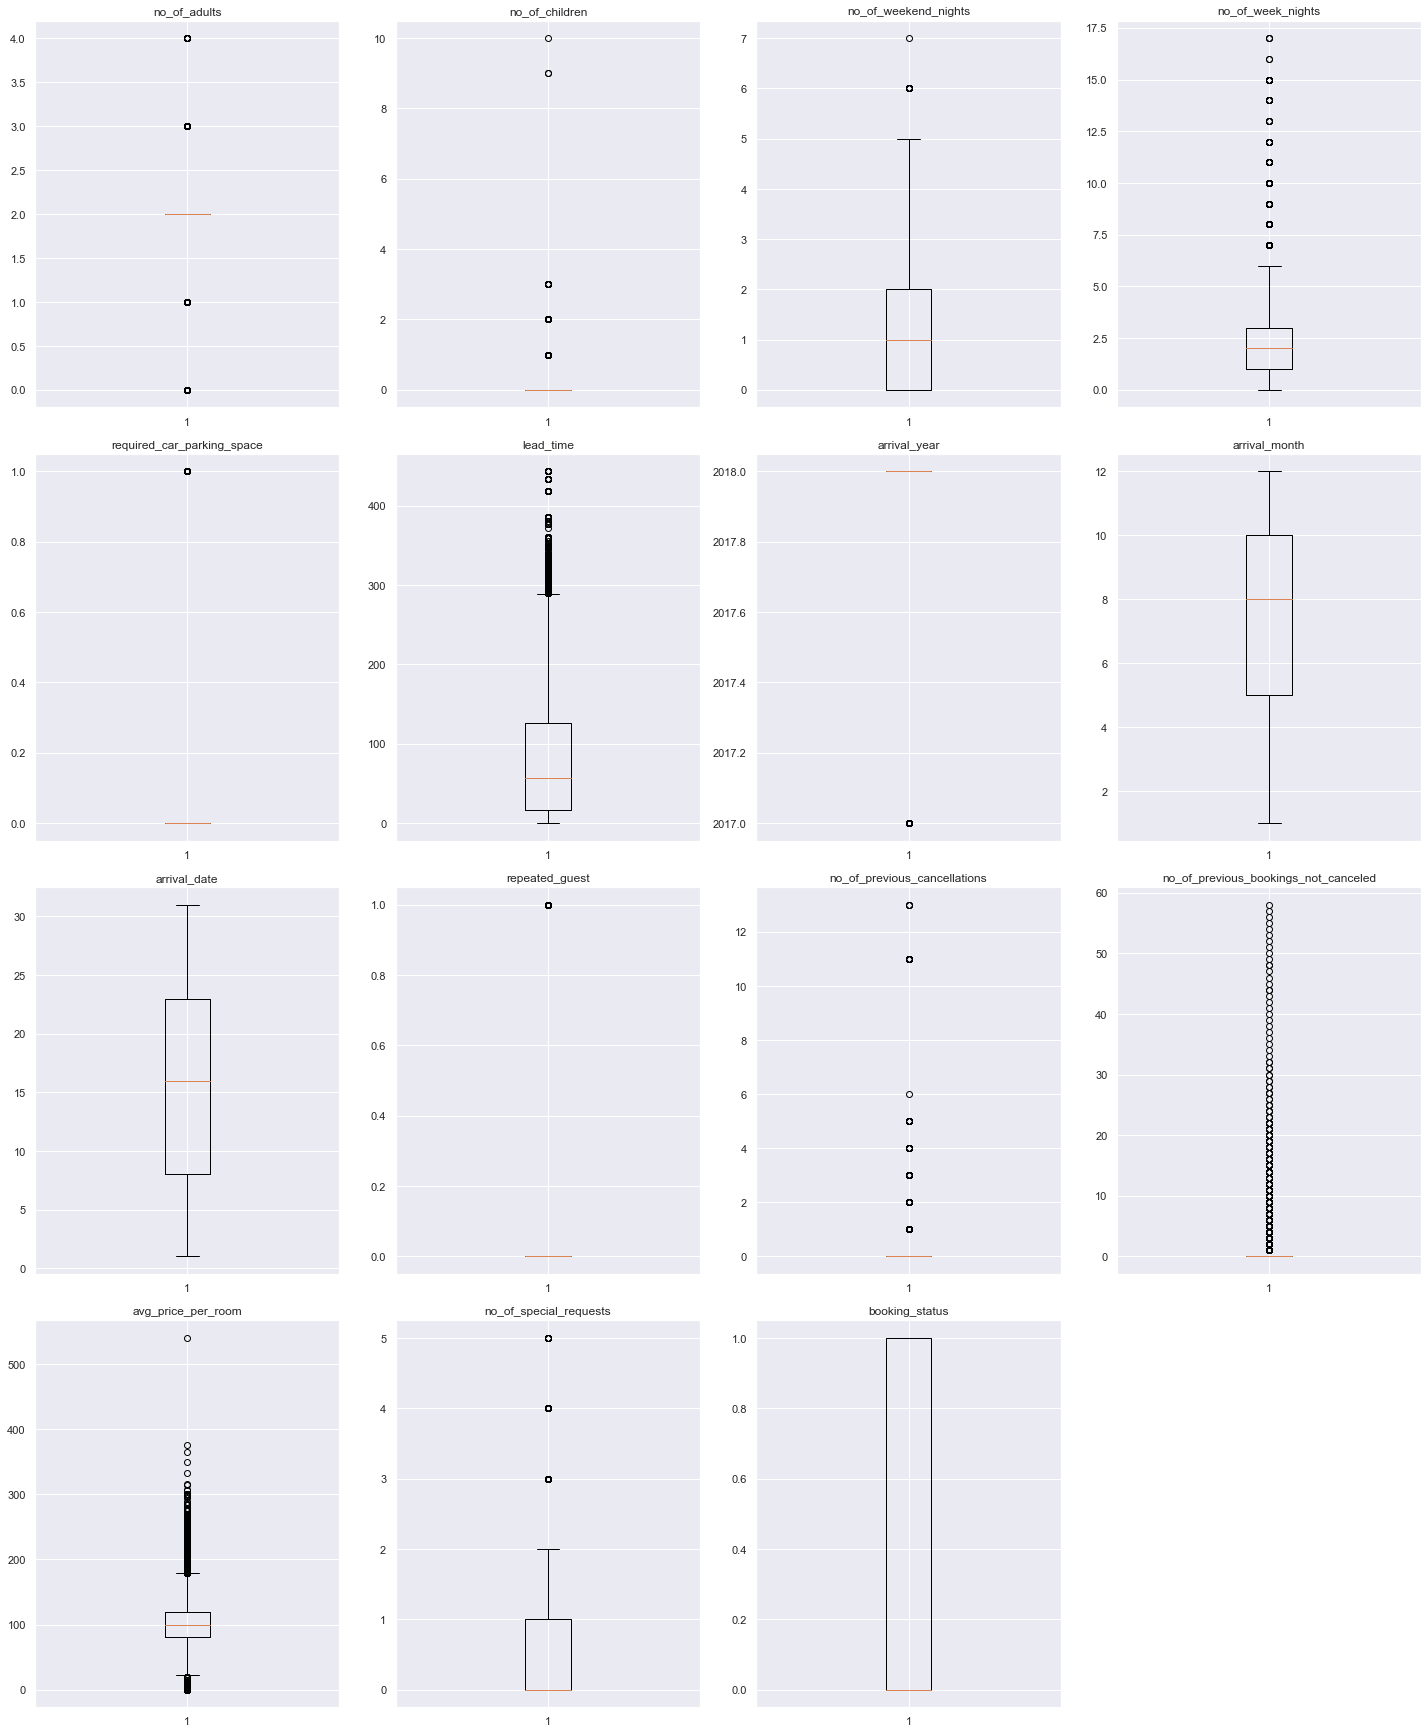

In [51]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
- *Arrival_date and arrival_month have no outliers have no outliers but the rest of independent variables do have outliers.*
- *We shall not treat outliers for every independent variable because in columns like no_of_children and no_of adults and more, removing outliers will remove the variation in the columns and most likely make them a constant, which is not desirable.*

In [52]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [53]:
# list of columns to treat for outliers
treat_out_cols = ["lead_time", "avg_price_per_room", "no_of_week_nights", "no_of_weekend_nights"]

**NB**: I have included *no_of_week_nights* and *no_of_weekend_nights* to be treated for outliers becuase during the EDA, we saw clearly that week nights were from Monday to Friday and weekend nights were on Staurday and Sunday. So, either a customer books 0, 1 or 2 weekend nights and either 0,1,2,3,4,5 week nights . Booking more than 2 weekend nights or more than 5 week nights would mean booking for seperate weeks which is very rare.

In [54]:
# create a new data frame after treating outliers in the colums
df1 = treat_outliers_all(df, treat_out_cols)

### Re-check columns to see if outliers were treated

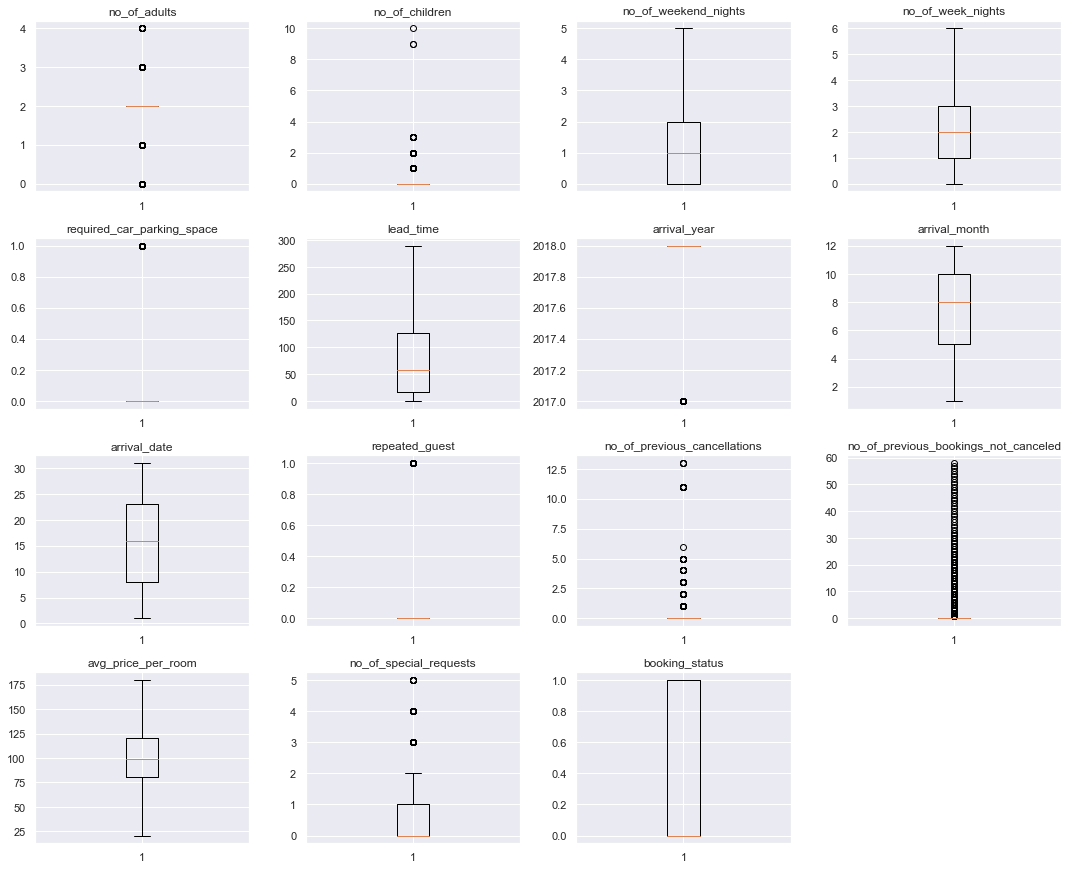

In [55]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [56]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81012,0.86734,0.00000,0.00000,1.00000,2.00000,5.00000
no_of_week_nights,36275.00000,2.17784,1.29062,0.00000,1.00000,2.00000,3.00000,6.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,83.76175,81.65691,0.00000,17.00000,57.00000,126.00000,289.50000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


## Data Preparation for modeling 

#### Creating Training and Test sets

In [57]:
X = df1.drop(["booking_status"], axis=1)
Y = df1["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [58]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


## Building the model

### Model evaluation criterion
### Model can make wrong predictions as:
1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
- Both the cases are important as:

- If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

- If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.

### How to reduce the losses?
- Hotel would want F1 Score to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
- First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
- The model_performance_classification_statsmodels function will be used to check the model performance of models.
- The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [60]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Logistic Regression model

In [61]:
X = df1.drop(["booking_status"], axis=1)
Y = df1["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [62]:
# fitting logistic regression model with stats library
logit = sm.Logit(y_train, X_train.astype(float))
# fitting logistic regression model
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.3298
Time:                        01:26:43   Log-Likelihood:                -10784.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -986.9000    121.097     -8.150      0.000   -1224.245    -749.555
no_of_adults                             0.1111      

## Model performance evaluation

In [63]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80521,0.63458,0.73739,0.68213


#### Observations

- Negative values of the coefficient shows that probability of customer cancelling decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of a customer cancelling increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [64]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39375139.55960
no_of_adults                                  1.35253
no_of_children                                1.97481
no_of_weekend_nights                          1.05611
no_of_week_nights                             1.09497
required_car_parking_space                    1.03985
lead_time                                     1.39010
arrival_year                                  1.42750
arrival_month                                 1.27449
arrival_date                                  1.00657
repeated_guest                                1.78454
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65208
avg_price_per_room                            1.96685
no_of_special_requests                        1.24830
type_of_meal_plan_Meal Plan 2                 1.26266
type_of_meal_plan_Meal Plan 3                 1.02513
type_of_meal_plan_Not Selected                1

#### Dropping *market_segment_type_Online*

In [65]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39295770.00293
no_of_adults                                  1.33643
no_of_children                                1.97396
no_of_weekend_nights                          1.05556
no_of_week_nights                             1.09485
required_car_parking_space                    1.03972
lead_time                                     1.38569
arrival_year                                  1.42496
arrival_month                                 1.27338
arrival_date                                  1.00655
repeated_guest                                1.78134
no_of_previous_cancellations                  1.39545
no_of_previous_bookings_not_canceled          1.65184
avg_price_per_room                            1.96583
no_of_special_requests                        1.24343
type_of_meal_plan_Meal Plan 2                 1.26232
type_of_meal_plan_Meal Plan 3                 1.02513
type_of_meal_plan_Not Selected                1

#### Observations:
 - Dropping *market_segment_type_Online* variable reduces the VIF in all the other columns that had a high VIF before to less than 5.

#### Let us take a look at the model  performance after removing Multicollinearity

In [66]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

         Current function value: 0.424785
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.80533,0.63482,0.73757,0.68235


#### Observations: 
- There is no significant change in the performance of the model

#### Removing columns with p-value > 0.05

In [67]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [68]:
X_train2 = X_train1[selected_features]

## Final Model summary

In [69]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp = False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.3287
Time:                        01:26:45   Log-Likelihood:                -10803.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -982.4991    120.763     -8.136      0.000   -1219.190    -745.808
no_of_adults                       0.1060      0.037      2.840      0.

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg2* as final model.**

In [70]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80470,0.63362,0.73659,0.68124


### Coefficient interpretations

* Coefficient of no_of_adults, no_of_children, no_of_weekend_nights,no_of_previous_cancellations,avg_price_per_room, meal types,arrival year are positive, an increase in these will lead to increase in chances of cancelling bookings. 

* Coefficient of some room types, Market segment types,marital_status, required_car_parking_space,arrival_month, repeated_guest,and no_of_special_requests are negative. Therefore an increase in these will lead to decrease in chances of booking cancellations.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [71]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11187,1.17814,1.12344,0.19900,1.01657,1.62484,0.96033,0.07449,1.24224,1.02040,0.22911,1.26615,1.34289,0.70165,0.75392,0.48420,0.48884,0.47371,0.46118,0.16804
Change_odd%,-100.00000,11.18664,17.81369,12.34359,-80.10017,1.65731,62.48402,-3.96700,-92.55105,24.22413,2.03982,-77.08937,26.61470,34.28853,-29.83498,-24.60801,-51.57978,-51.11608,-52.62935,-53.88185,-83.19564


### Coefficient interpretations
* `no_of_adults`: Holding all other features constant a 1 unit change in no_of_adults will increase the odds of a customer cancelling a booking by 1.11187 times or a 11.18664% increase in the odds of cancelling abooking.
- The other odds for the other variables can be explained in the similar way. If with negative percentage like **repeated_guest**, it means that, while holding other features constant, a unit change in repeated guest will decrease the odds of a customer cancelling bookings by 0.07453 or 92.54656 % decrease in the odds of cancelling bookins

#### Checking model performance on the training set

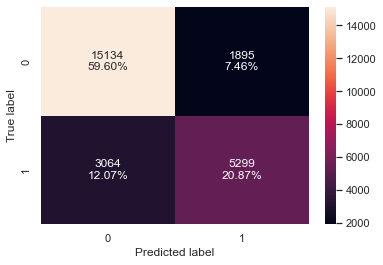

In [72]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [73]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80470,0.63362,0.73659,0.68124


#### ROC-AUC
* ROC-AUC on training set

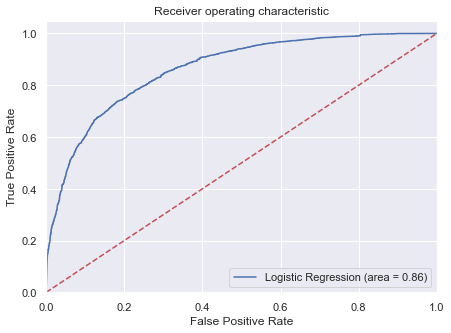

In [74]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Observations:
- Logistic Regression model is giving a good performance on training set.

Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [75]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.36418096345101625


#### Checking model performance on training set

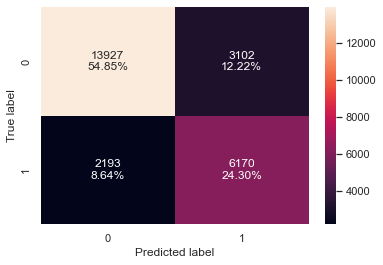

In [76]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [77]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79147,0.73777,0.66544,0.69974


* Precision and Accuracy of model has reduced but the other metrics have increased.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

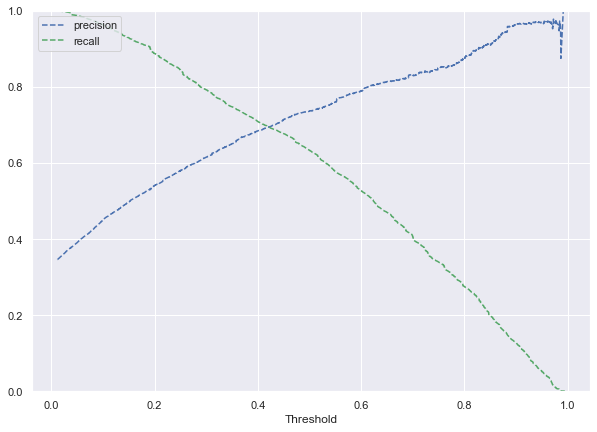

In [78]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [79]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

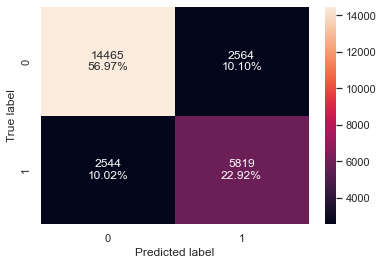

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [81]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79883,0.69580,0.69414,0.69497


* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.40 as the optimal threshold.

In [82]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.36 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.36 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80470,0.79147,0.79883
Recall,0.63362,0.73777,0.69580
Precision,0.73659,0.66544,0.69414
F1,0.68124,0.69974,0.69497


### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [83]:
X_test2 = X_test[list(X_train2.columns)]

**Using model with default threshold**

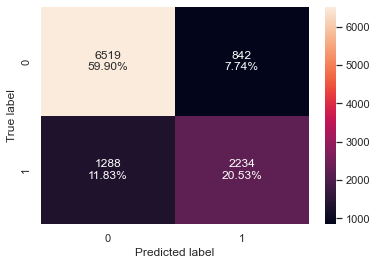

In [84]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [85]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80428,0.63430,0.72627,0.67717


* ROC curve on test set

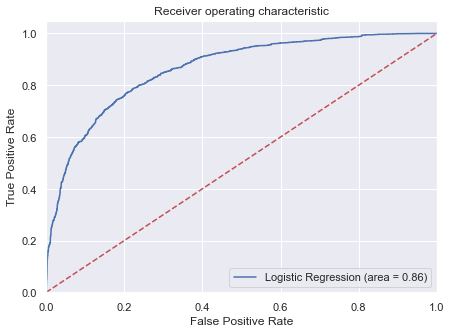

In [86]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.36** 

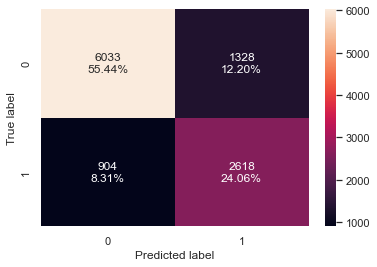

In [87]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [88]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79491,0.74333,0.66346,0.70112


**Using model with threshold = 0.42**

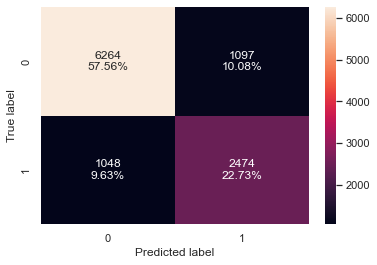

In [89]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [90]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80290,0.70244,0.69280,0.69759


### Model performance summary

In [91]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.36 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.36 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80470,0.79147,0.79883
Recall,0.63362,0.73777,0.69580
Precision,0.73659,0.66544,0.69414
F1,0.68124,0.69974,0.69497


In [92]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.36 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.36 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80428,0.79491,0.80290
Recall,0.63430,0.74333,0.70244
Precision,0.72627,0.66346,0.69280
F1,0.67717,0.70112,0.69759


### Insights:
- Since the goal is to maximize the F1 score;
    - The best threshold for the model is 0.36 whic gives us the highest F1 score on test data as compared to the other thresholds

## Decision Tree model

### Split Data

In [93]:
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

### Defining methods to check Performance of the trees 

In [94]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [95]:
 def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'. 

In [96]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

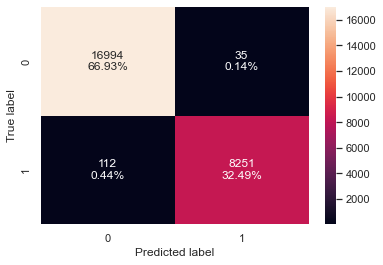

In [97]:
confusion_matrix_sklearn(model, X_train, y_train)

In [98]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


#### Checking model performance on test set

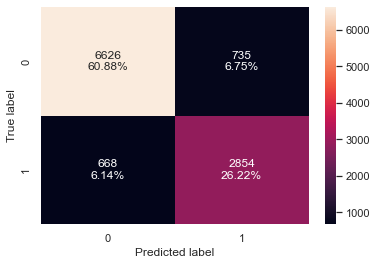

In [99]:
confusion_matrix_sklearn(model, X_test, y_test)

In [100]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87108,0.81034,0.79521,0.80270


#### Observations:
- *Accuracy is approximately 99% on the training set and ~87% on the test set*

### Checking for important features

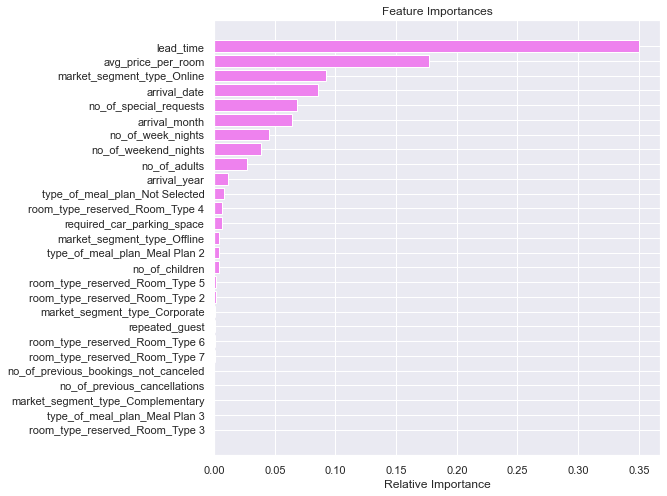

In [101]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [102]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.35035
avg_price_per_room                   0.17727
market_segment_type_Online           0.09234
arrival_date                         0.08526
no_of_special_requests               0.06795
arrival_month                        0.06457
no_of_week_nights                    0.04539
no_of_weekend_nights                 0.03853
no_of_adults                         0.02748
arrival_year                         0.01179
type_of_meal_plan_Not Selected       0.00823
room_type_reserved_Room_Type 4       0.00690
required_car_parking_space           0.00688
market_segment_type_Offline          0.00393
type_of_meal_plan_Meal Plan 2        0.00370
no_of_children                       0.00367
room_type_reserved_Room_Type 5       0.00168
room_type_reserved_Room_Type 2       0.00149
market_segment_type_Corporate        0.00065
repeated_guest                       0.00060
room_type_reserved_Room_Type 6       0.00058
room_type_

#### Observation:
- Number of days between the date of booking and the arrival date(lead_time) is the most important feature for predicting booking cancellations.

### Do we need to prune the tree?
- Let us take a look at the decison tree and decide if we need to prune

In [103]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


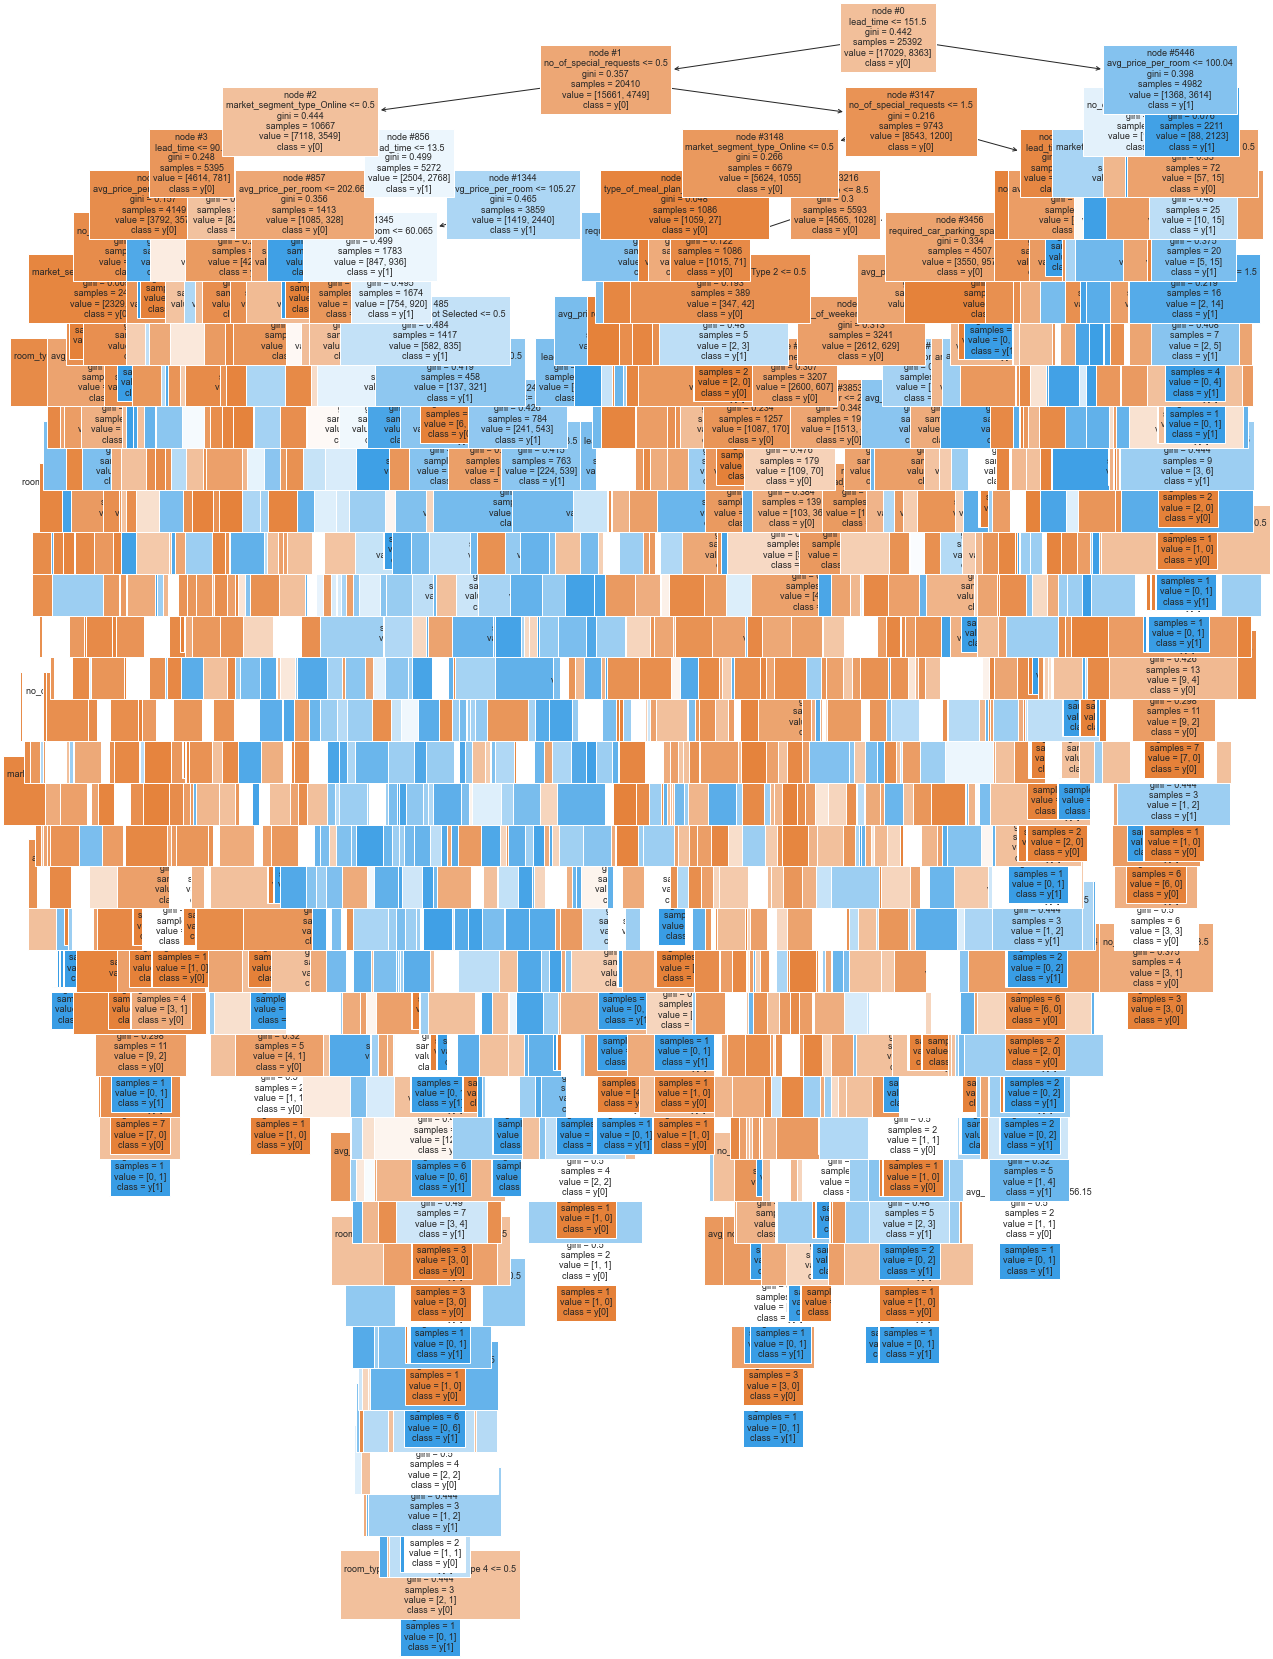

In [104]:
plt.figure(figsize=(20,30))
tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [105]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

In [106]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.35035
avg_price_per_room                   0.17727
market_segment_type_Online           0.09234
arrival_date                         0.08526
no_of_special_requests               0.06795
arrival_month                        0.06457
no_of_week_nights                    0.04539
no_of_weekend_nights                 0.03853
no_of_adults                         0.02748
arrival_year                         0.01179
type_of_meal_plan_Not Selected       0.00823
room_type_reserved_Room_Type 4       0.00690
required_car_parking_space           0.00688
market_segment_type_Offline          0.00393
type_of_meal_plan_Meal Plan 2        0.00370
no_of_children                       0.00367
room_type_reserved_Room_Type 5       0.00168
room_type_reserved_Room_Type 2       0.00149
market_segment_type_Corporate        0.00065
repeated_guest                       0.00060
room_type_reserved_Room_Type 6       0.00058
room_type_

#### Observations:
- *The tree above is very complex, such trees often overfit the data
  Hence we shall go ahead and prune.*
- *Also the accuracy on the training set was ~12% greater than that of the testing set. We want to make sure these two are as close as possible at least with 5% range so that we are sure our model will perform well with new data.*

### Reducing Over fitting
 * In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 4

In [107]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth=4,random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

### Confusion Matrix - decision tree with depth restricted to 4

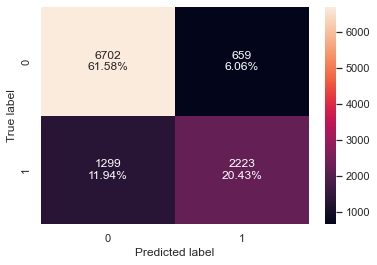

In [108]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [109]:
decision_tree1_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree1_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
print(decision_tree_perf_train)
print(decision_tree1_perf_test)

   Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117
   Accuracy  Recall  Precision      F1
0   0.82009 0.63118    0.77134 0.69425


#### Observation:


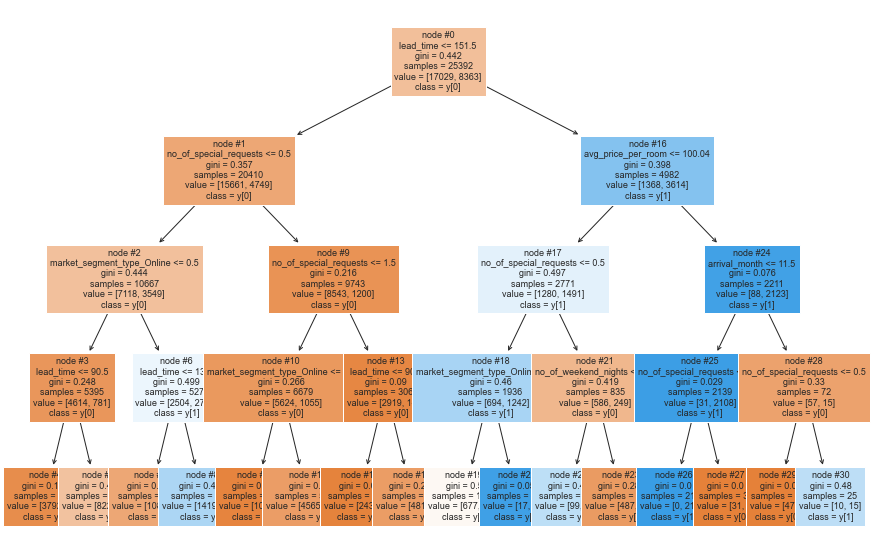

In [110]:
plt.figure(figsize=(15,10))

tree.plot_tree(model1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [111]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- weights: [3792.00, 357.00] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- weights: [822.00, 424.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- weights: [1085.00, 328.00] class: 0
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- weights: [1419.00, 2440.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- market_segment_type_Online <= 0.50
|   |   |   |   |--- weights: [1059.00, 27.00] class: 0
|   |   |   |--- market_segment_type_Online >  0.50
|   |   |   |   |--- weights: [4565.00, 1028.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- weights: [2438.00, 38.00] class: 0
|   |   |   |--- lead_time > 

* The tree has become readable now but the F1 score on test set has reduced.

In [112]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.51192
market_segment_type_Online           0.21483
no_of_special_requests               0.14960
avg_price_per_room                   0.09248
arrival_month                        0.01776
no_of_weekend_nights                 0.01341
no_of_week_nights                    0.00000
room_type_reserved_Room_Type 2       0.00000
market_segment_type_Offline          0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 3       0.00000
type_of_meal_plan_Meal Plan 3        0.00000
type_of_meal_plan_Not Selected       0.00000
required_car_parking_space           0.00000
type_of_meal_plan_Meal Plan 2        0.00000
no_of_children                       0.00000
no_of_prev

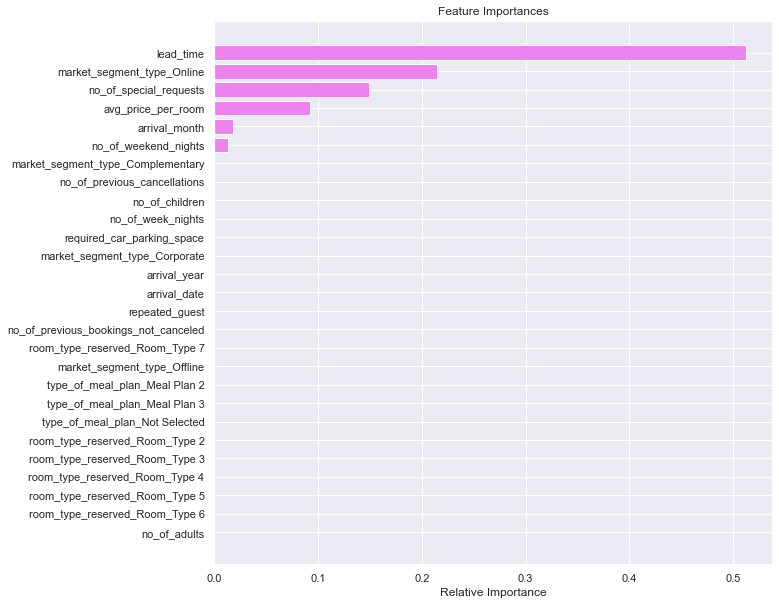

In [113]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* You can see in important features of previous model, **no_of_week_nights** was included among important features  but here it is not included.
  this is the shortcoming of pre pruning, we just limit it even before knowing the importance of features and split.

* That's why we will go for pre pruning using grid search, maybe setting max_depth to 4 is not good enough
* It is bad to have a very low depth because your model will underfit 
* Let's see how to find the best values

### Using GridSearch for Hyperparameter tuning of our tree model

In [114]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

* The maximum depth for the estimator is 4 as we had chosen before

### Confusion Matrix - decision tree with tuned hyperparameters

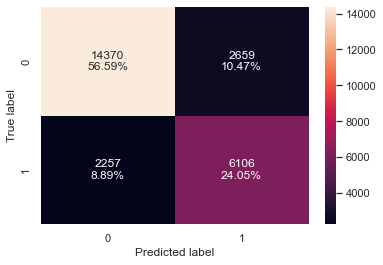

In [115]:
confusion_matrix_sklearn(estimator, X_train, y_train)

#### Checking model performance on test set

In [116]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.80640,0.73012,0.69663,0.71298


#### Checking model performance on test set

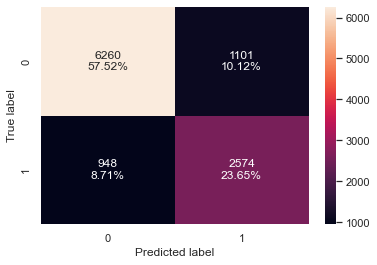

In [117]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [118]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.81172,0.73083,0.70041,0.71530


* After tuning hyperparameters, the performance of the model has become more generalised. The perfomance measures on the train data set are approximately equal to the performance measures on the test data set. 
- There fore we have reduced overfitting

### Visualizing the Decison Tree

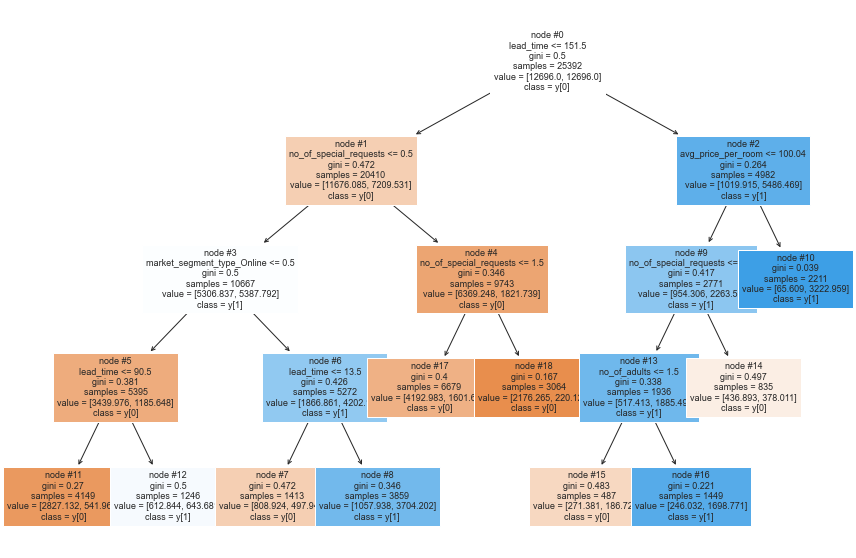

In [119]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [120]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- weights: [2827.13, 541.97] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- weights: [612.84, 643.68] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- weights: [808.92, 497.94] class: 0
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- weights: [1057.94, 3704.20] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [4192.98, 1601.61] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [2176.27, 220.13] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |--- weights: [271.38, 186.73] class: 0
|   |   |   |--- no_of_adults > 

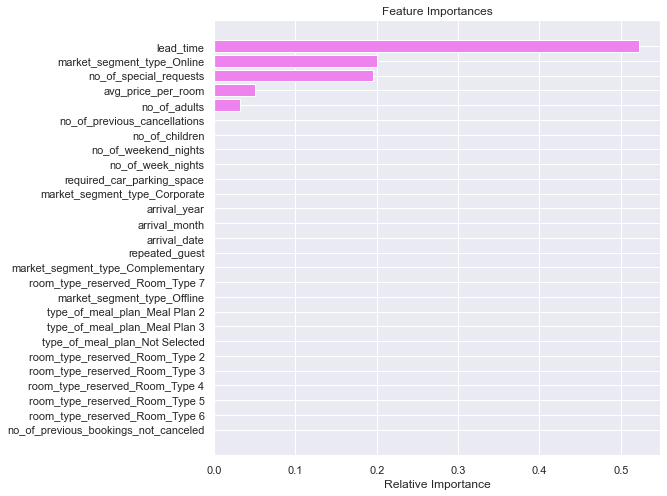

In [121]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [122]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                         Imp
lead_time                            0.52272
market_segment_type_Online           0.19992
no_of_special_requests               0.19529
avg_price_per_room                   0.04984
no_of_adults                         0.03223
type_of_meal_plan_Not Selected       0.00000
market_segment_type_Offline          0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 3       0.00000
room_type_reserved_Room_Type 2       0.00000
no_of_week_nights                    0.00000
required_car_parking_space           0.00000
type_of_meal_plan_Meal Plan 2        0.00000
no_of_children                       0.00000
no_of_previous_bookings_not_canceled 0.00000
no_of_previous_cancellations         0.00000
repeated_g

* You can see in important features of previous model, no_of_adults was lost, but here importance of no_of_adults variable is back
This shows that hyperparameter tuning using Grid Search is better than randomly limiting a Hyperparameter

* But post pruning might give even better results, since there is quite a good possibility that we might neglect some hyperparameters, post pruning will take care of all that.

### Cost Complexity Pruning

In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned

### Post Prunning

In [123]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [124]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,-0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1837,0.00890,0.32806
1838,0.00980,0.33786
1839,0.01272,0.35058
1840,0.03412,0.41882


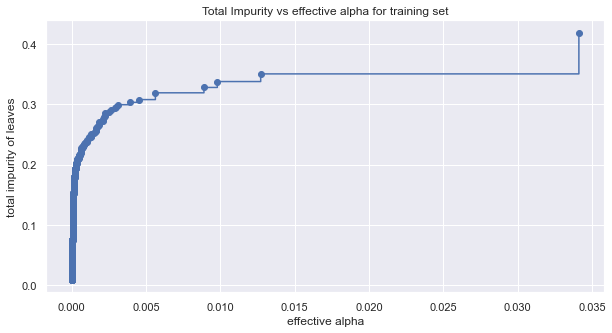

In [125]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [126]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

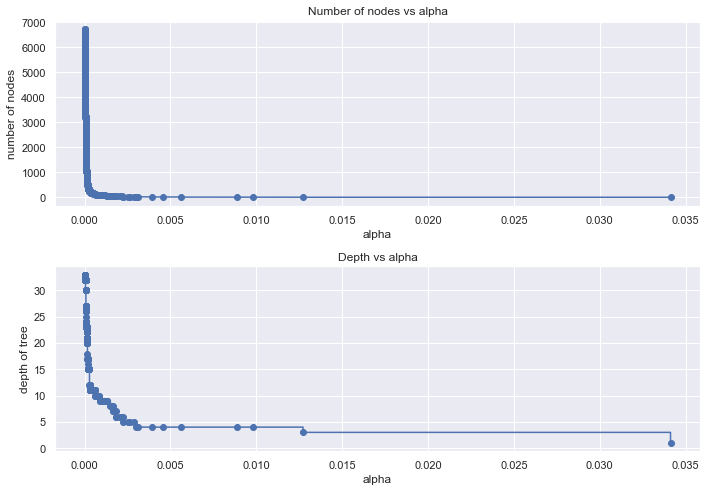

In [127]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs alpha for training and testing sets
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 99% training accuracy and 87% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [128]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

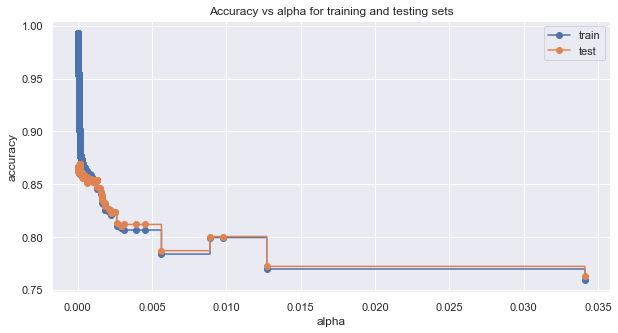

In [129]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [130]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00013338844575845263,
                       class_weight='balanced', random_state=1)
Training accuracy of best model:  0.895203213610586
Test accuracy of best model:  0.868878066709547


#### Since accuracy isn't the target metric for our model we would want high F1 score

### F1 Score vs alpha for training and testing sets

In [131]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

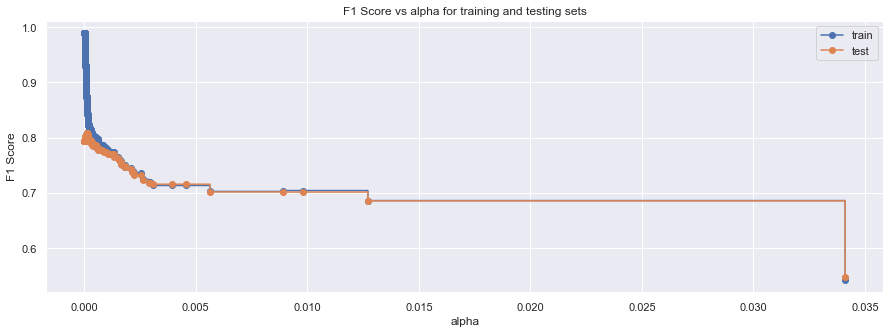

In [132]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [133]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001226763315516701, class_weight='balanced',
                       random_state=1)


### Confusion Matrix - post-pruned decision tree

#### Checking performance on training set

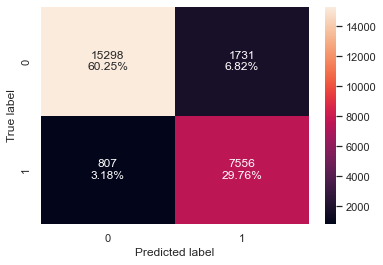

In [134]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [135]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.90005,0.90350,0.81361,0.85620


#### Checking Performance on test data

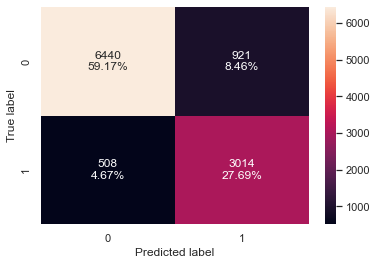

In [136]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [137]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86869,0.85576,0.76595,0.80837


### Visualizing the decision tree

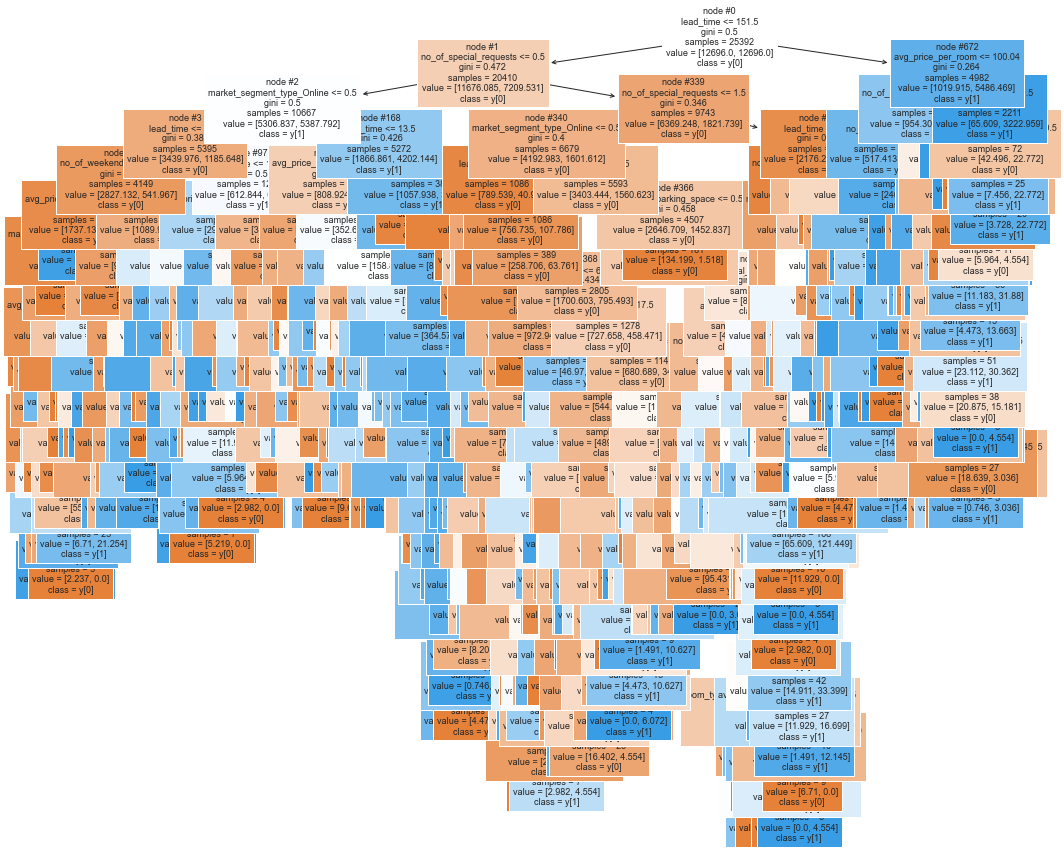

In [138]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

-*The decision tree still looks some how complicated but it is less complicated than our initial tree that we had before prunning*

In [139]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

In [140]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.39285
market_segment_type_Online           0.13331
avg_price_per_room                   0.12401
no_of_special_requests               0.12071
arrival_month                        0.05955
arrival_date                         0.03479
no_of_week_nights                    0.02842
no_of_weekend_nights                 0.02653
no_of_adults                         0.02546
arrival_year                         0.01892
market_segment_type_Offline          0.01331
required_car_parking_space           0.01006
type_of_meal_plan_Not Selected       0.00546
room_type_reserved_Room_Type 4       0.00190
room_type_reserved_Room_Type 6       0.00096
no_of_previous_bookings_not_canceled 0.00082
room_type_reserved_Room_Type 2       0.00081
type_of_meal_plan_Meal Plan 2        0.00066
room_type_reserved_Room_Type 5       0.00058
no_of_children                       0.00056
repeated_guest                       0.00034
no_of_prev

* lead_time and avg_price_per_room per booking are the most important features.

### Comparisons of the Decision Tree Models

In [141]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.80640,0.90005
Recall,0.98661,0.73012,0.90350
Precision,0.99578,0.69663,0.81361
F1,0.99117,0.71298,0.85620


In [142]:

# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87108,0.81172,0.86869
Recall,0.81034,0.73083,0.85576
Precision,0.79521,0.70041,0.76595
F1,0.80270,0.71530,0.80837


## Model Performance Comparison and Conclusions

- Since our goal and the goal of the company is to maximize F1 score which means, the greater the F1 score the higher the chances of minimizing **false negatives** and **false positives**;
- The decision tree models allow us achieve a high F1 score as a compared to the final logistic regression model
- ***Decision tree with post-pruning is giving the highest F1 score on test set of approximately 81%*** 

- If the company wants a more simpler and generalized model, It can go with the pre pruned one(estimator) as the tree is easier to read and the score values are closer to one another for training and testing data sets as compared to the post pruned model. Also it gives a higher F1 score of about 72% as compared to that of the logistic regression model which is about 70%.

*But, the best model I would Recommend  for the company is the post prunned decision tree model(*best_model*). That is so because it reduces overfitting and enables us achieve the highest F1 score on the test data and this is the main goal*

## Actionable Insights and Recommendations

Because booking cancellations are innevitable, INN Hotel groups should do the following to reduce no shows and cancellations at their hotels;

- Make sure to have a cancellation policy and make it visible to their guests. This policy may include a deadline in which a cancellation can be made forexample a 24 hr heads up otherwise, they charge a fee from the customer. In this way, there is more time for the cancelled booking to be transfered to another customer.
- They can also offer discounts for confirmed bookings
- Send reminders to guests about their bookings

*Hence with reduced cancellations, the hotels will not suffer so many losses.*




**Summary of insights:**

- The more the number of days between the date of booking and the arrival date, the more chances of cancelling bookings. This is true because if a customer makes a booking with a higher lead_time, it gives time for the unexpected to happen causing the customer to cancel the booking.
- October is the busiest month
- January is the least busiest month
- Repeated guests have lower chances of cancelling bookings.